In [1]:
# 기본 import
import pandas as pd # pd.DataFrame(변수)
import numpy as np # np.array(리스트)
import matplotlib.pyplot as plt  # plt.hist(변수), plt.plot(hy.history['loss'],color='r')    

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

from bs4 import BeautifulSoup #마크업태그를정리하는

import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
with open('ratings_train.txt', "r") as f:
    train = [문장.split('\t') for 문장 in f.read().splitlines()]  
with open('ratings_test.txt', "r") as f:
    test = [문장.split('\t') for 문장 in f.read().splitlines()]
train[:3]  # 데이터 모양 확인

[['id', 'document', 'label'],
 ['9976970', '아 더빙.. 진짜 짜증나네요 목소리', '0'],
 ['3819312', '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나', '1']]

In [3]:
test[:3]

[['id', 'document', 'label'],
 ['6270596', '굳 ㅋ', '1'],
 ['9274899', 'GDNTOPCLASSINTHECLUB', '0']]

In [4]:
train = train[1:]  # 0인덱 필요없으니 제외하고 슬라이스 
test = test[1:]

In [5]:
train = pd.DataFrame(train)
test = pd.DataFrame(test)

In [6]:
train = train[[1,2]]
test = test[[1,2]]
#인풋아웃풋슬라이스

In [7]:
test.head()

,1,2
0,굳 ㅋ,1
1,GDNTOPCLASSINTHECLUB,0
2,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [8]:
# 시리즈이름변경
train= train.rename(columns={1:'x',2:'y'})
train.head()
test= test.rename(columns={1:'x',2:'y'})
test.head()

,x,y
0,굳 ㅋ,1
1,GDNTOPCLASSINTHECLUB,0
2,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [9]:
한글불용어 = '아 휴 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 된이상 만큼 어찌됏든 그위에 게다가 점에서 보아 비추어 보아 고려하면 하게될것이다 일것이다 비교적 좀 보다더 비하면 시키다 하게하다 할만하다 의해서 연이서 이어서 잇따라 뒤따라 뒤이어 결국 의지하여 기대여 통하여 자마자 더욱더 불구하고 얼마든지 마음대로 주저하지 않고 곧 즉시 바로 당장 하자마자 밖에 안된다 하면된다 그래 그렇지 요컨대 다시 말하자면 바꿔 말하면 즉 구체적으로 말하자면 시작하여 시초에 이상 허 헉 허걱 바와같이 해도좋다 해도된다 게다가 더구나 하물며 와르르 팍 퍽 펄렁 동안 이래 하고있었다 이었다 에서 로부터 까지 예하면 했어요 해요 함께 같이 더불어 마저 마저도 양자 모두 습니다 가까스로 하려고하다 즈음하여 다른 다른 방면으로 해봐요 습니까 했어요 말할것도 없고 무릎쓰고 개의치않고 하는것만 못하다 하는것이 낫다 매 매번 들 모 어느것 어느 로써 갖고말하자면 어디 어느쪽 어느것 어느해 어느 년도 라 해도 언젠가 어떤것 어느것 저기 저쪽 저것 그때 그럼 그러면 요만한걸 그래 그때 저것만큼 그저 이르기까지 할 줄 안다 할 힘이 있다 너 너희 당신 어찌 설마 차라리 할지언정 할지라도 할망정 할지언정 구토하다 게우다 토하다 메쓰겁다 옆사람 퉤 쳇 의거하여 근거하여 의해 따라 힘입어 그 다음 버금 두번째로 기타 첫번째로 나머지는 그중에서 견지에서 형식으로 쓰여 입장에서 위해서 단지 의해되다 하도록시키다 뿐만아니라 반대로 전후 전자 앞의것 잠시 잠깐 하면서 그렇지만 다음에 그러한즉 그런즉 남들 아무거나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 어떻게 만약 만일 위에서 서술한바와같이 인 듯하다 하지 않는다면 만약에 무엇 무슨 어느 어떤 아래윗 조차 한데 그럼에도 불구하고 여전히 심지어 까지도 조차도 하지 않도록 않기 위하여 때 시각 무렵 시간 동안 어때 어떠한 하여금 네 예 우선 누구 누가 알겠는가 아무도 줄은모른다 줄은 몰랏다 하는 김에 겸사겸사 하는바 그런 까닭에 한 이유는 그러니 그러니까 때문에 그 너희 그들 너희들 타인 것 것들 너 위하여 공동으로 동시에 하기 위하여 어찌하여 무엇때문에 붕붕 윙윙 나 우리 엉엉 휘익 윙윙 오호 아하 어쨋든 만 못하다 하기보다는 차라리 하는 편이 낫다 흐흐 놀라다 상대적으로 말하자면 마치 아니라면 쉿 그렇지 않으면 그렇지 않다면 안 그러면 아니었다면 하든지 아니면 이라면 좋아 알았어 하는것도 그만이다 어쩔수 없다 하나 일 일반적으로 일단 한켠으로는 오자마자 이렇게되면 이와같다면 전부 한마디 한항목 근거로 하기에 아울러 하지 않도록 않기 위해서 이르기까지 이 되다 로 인하여 까닭으로 이유만으로 이로 인하여 그래서 이 때문에 그러므로 그런 까닭에 알 수 있다 결론을 낼 수 있다 으로 인하여 있다 어떤것 관계가 있다 관련이 있다 연관되다 어떤것들 에 대해 이리하여 그리하여 여부 하기보다는 하느니 하면 할수록 운운 이러이러하다 하구나 하도다 다시말하면 다음으로 에 있다 에 달려 있다 우리 우리들 오히려 하기는한데 어떻게 어떻해 어찌됏어 어때 어째서 본대로 자 이 이쪽 여기 이것 이번 이렇게말하자면 이런 이러한 이와 같은 요만큼 요만한 것 얼마 안 되는 것 이만큼 이 정도의 이렇게 많은 것 이와 같다 이때 이렇구나 것과 같이 끼익 삐걱 따위 와 같은 사람들 부류의 사람들 왜냐하면 중의하나 오직 오로지 에 한하다 하기만 하면 도착하다 까지 미치다 도달하다 정도에 이르다 할 지경이다 결과에 이르다 관해서는 여러분 하고 있다 한 후 혼자 자기 자기집 자신 우에 종합한것과같이 총적으로 보면 총적으로 말하면 총적으로 대로 하다 으로서 참 그만이다 할 따름이다 쿵 탕탕 쾅쾅 둥둥 봐 봐라 아이야 아니 와아 응 아이 참나 년 월 일 령 영 일 이 삼 사 오 육 륙 칠 팔 구 이천육 이천칠 이천팔 이천구 하나 둘 셋 넷 다섯 여섯 일곱 여덟 아홉 령 영 이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 그리고 좋 크 따르 중 나오 가지 씨 시키 만들 지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 명 생각 시간 그녀 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 놓' 

In [10]:
  # 데이터['시리즈']에서 전처리(시리즈, r_stw=True) 를 넣어주면 마크업제거, 소문자화, 불용어제거 해주는 def
 
def 전처리(X, r_stw=False): #stw불용어 디폴트폴스
    # 1. html태그제거 (뷰티플스프)
    tr_X = BeautifulSoup(X, 'lxml').get_text() #마크업정리 > txt정보만 가지고 온다
    # 2. 영어확인및정리
    tr_X = re.sub('[^ ㄱ-ㅣ가-힣]',' ', tr_X) # 공백,한글 or연산 > 아닐 시 인 조건 # [ ] 안 ^ 는 부정의 의미 / 한글  아닐 시 > 띄어쓰기하나로 변경  #   tr_X를받아서 한글이아니면 공백으로 변경
    # 3. 대문자소문자변경
    w= tr_X.split() #소문자화,공백기준스플릿 
    # 4.불용어처리
    if r_stw: # r_stw 트루라면
        # stps = set(stopwords.words('english')) # 불용어보캐
        # stps.add(불용어문자열) : 불용어추가가능
        w = [i for i in w if not i in 한글불용어] # 불용어보캐에 없다면 추가
    # 5.단어결합
    c_x = ' '.join(w)    # ,를 ' '으로 조인
    return c_x
     

In [11]:
train['c_x'] = train['x'].apply(lambda x:전처리(X=x, r_stw=True ))    #어플라이 함수를인스턴스하나하나다넣어줌
test['c_x'] = test['x'].apply(lambda x:전처리(X=x, r_stw=True ))    #어플라이 함수를인스턴스하나하나다넣어줌

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:273: UserWarning: "b'..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "http://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=103&oid=005&aid=0000643652" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "https://t1.search.daumcdn.net/thumb/C110x160.q70/?fname=http%3A%2F%2Fcf

In [12]:
train.head(3)

,x,y,c_x
0,아 더빙.. 진짜 짜증나네요 목소리,0,더빙 짜증나네요 목소리
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나
2,너무재밓었다그래서보는것을추천한다,0,너무재밓었다그래서보는것을추천한다


In [13]:
test.head(3)

,x,y,c_x
0,굳 ㅋ,1,굳 ㅋ
1,GDNTOPCLASSINTHECLUB,0,
2,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0,뭐야 평점들은 나쁘진 않지만 짜리는 더더욱 아니잖아


In [14]:
# 아웃풋 세팅
train['y_name'] = train['y']
train['encoder_y'] = LabelEncoder().fit_transform(train['y']) # 이진  미리세팅
train['categorical_y'] = list(to_categorical(train['encoder_y']))   # 다중  미리세팅
# 아웃풋 세팅
test['y_name'] = test['y']
test['encoder_y'] = LabelEncoder().fit_transform(test['y']) # 이진  미리세팅
test['categorical_y'] = list(to_categorical(test['encoder_y']))   # 다중  미리세팅

In [15]:
train.head()

,x,y,c_x,y_name,encoder_y,categorical_y
0,아 더빙.. 진짜 짜증나네요 목소리,0,더빙 짜증나네요 목소리,0,0,"[1.0, 0.0]"
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1,1,"[0.0, 1.0]"
2,너무재밓었다그래서보는것을추천한다,0,너무재밓었다그래서보는것을추천한다,0,0,"[1.0, 0.0]"
3,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,교도소 이야기구먼 솔직히 재미는 평점 조정,0,0,"[1.0, 0.0]"
4,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,1,"[0.0, 1.0]"


In [16]:
test.head()

,x,y,c_x,y_name,encoder_y,categorical_y
0,굳 ㅋ,1,굳 ㅋ,1,1,"[0.0, 1.0]"
1,GDNTOPCLASSINTHECLUB,0,,0,0,"[1.0, 0.0]"
2,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0,뭐야 평점들은 나쁘진 않지만 짜리는 더더욱 아니잖아,0,0,"[1.0, 0.0]"
3,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0,지루하지는 않은데 완전 막장임 돈주고 보기에는,0,0,"[1.0, 0.0]"
4,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0,아니었어도 별 줬을텐데 나와서 심기를 불편하게 하죠,0,0,"[1.0, 0.0]"


In [17]:
# 결측치 확인 # 둘다 결측없음
train.isnull().values.any() # 결측하나라도잇으면true

False

In [18]:
# 결측치 확인
test.isnull().values.any() # 결측하나라도잇으면true

False

In [19]:
# 중복 확인 # train test둘다 중복있음
train['c_x'].nunique(), train['y'].nunique()

(142627, 2)

In [20]:
train

,x,y,c_x,y_name,encoder_y,categorical_y
0,아 더빙.. 진짜 짜증나네요 목소리,0,더빙 짜증나네요 목소리,0,0,"[1.0, 0.0]"
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1,1,"[0.0, 1.0]"
2,너무재밓었다그래서보는것을추천한다,0,너무재밓었다그래서보는것을추천한다,0,0,"[1.0, 0.0]"
3,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,교도소 이야기구먼 솔직히 재미는 평점 조정,0,0,"[1.0, 0.0]"
4,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,1,"[0.0, 1.0]"
...,...,...,...,...,...,...
149995,인간이 문제지.. 소는 뭔죄인가..,0,인간이 문제지 소는 뭔죄인가,0,0,"[1.0, 0.0]"
149996,평점이 너무 낮아서...,1,평점이 너무 낮아서,1,1,"[0.0, 1.0]"
149997,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0,이게 뭐요 한국인은 거들먹거리고 필리핀 혼혈은,0,0,"[1.0, 0.0]"
149998,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1,청춘 영화의 최고봉 방황과 우울했던 날들의 자화상,1,1,"[0.0, 1.0]"


In [21]:
# 중복 확인
test['c_x'].nunique(), test['y'].nunique()

(48083, 2)

In [22]:
test

,x,y,c_x,y_name,encoder_y,categorical_y
0,굳 ㅋ,1,굳 ㅋ,1,1,"[0.0, 1.0]"
1,GDNTOPCLASSINTHECLUB,0,,0,0,"[1.0, 0.0]"
2,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0,뭐야 평점들은 나쁘진 않지만 짜리는 더더욱 아니잖아,0,0,"[1.0, 0.0]"
3,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0,지루하지는 않은데 완전 막장임 돈주고 보기에는,0,0,"[1.0, 0.0]"
4,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0,아니었어도 별 줬을텐데 나와서 심기를 불편하게 하죠,0,0,"[1.0, 0.0]"
...,...,...,...,...,...,...
49995,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1,1,"[0.0, 1.0]"
49996,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0,박약들이나 하는거다 탈영은 주인공 김대희 닮았고 이등병 찐따,0,0,"[1.0, 0.0]"
49997,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0,그림도 좋고 완성도도 높았지만 내내 불안하게 만든다,0,0,"[1.0, 0.0]"
49998,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0,절대 봐서는 영화 재미도 기분만 잡치고 세트장에서 해먹네,0,0,"[1.0, 0.0]"


In [23]:
#중복제거
train = train.drop_duplicates(subset=['c_x'])
#중복제거
test = test.drop_duplicates(subset=['c_x'])
#중복제거완료

In [24]:
# 중복 확인 # train test둘다 중복있음
train['c_x'].nunique(), train['y'].nunique() 


(142627, 2)

In [25]:
train

,x,y,c_x,y_name,encoder_y,categorical_y
0,아 더빙.. 진짜 짜증나네요 목소리,0,더빙 짜증나네요 목소리,0,0,"[1.0, 0.0]"
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1,1,"[0.0, 1.0]"
2,너무재밓었다그래서보는것을추천한다,0,너무재밓었다그래서보는것을추천한다,0,0,"[1.0, 0.0]"
3,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,교도소 이야기구먼 솔직히 재미는 평점 조정,0,0,"[1.0, 0.0]"
4,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,1,"[0.0, 1.0]"
...,...,...,...,...,...,...
149994,디케이드 다음에 더블 다음에 오즈인데 더블은 조금밖에 안나오네요.,1,디케이드 더블 오즈인데 더블은 조금밖에 안나오네요,1,1,"[0.0, 1.0]"
149995,인간이 문제지.. 소는 뭔죄인가..,0,인간이 문제지 소는 뭔죄인가,0,0,"[1.0, 0.0]"
149997,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0,이게 뭐요 한국인은 거들먹거리고 필리핀 혼혈은,0,0,"[1.0, 0.0]"
149998,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1,청춘 영화의 최고봉 방황과 우울했던 날들의 자화상,1,1,"[0.0, 1.0]"


In [26]:
test

,x,y,c_x,y_name,encoder_y,categorical_y
0,굳 ㅋ,1,굳 ㅋ,1,1,"[0.0, 1.0]"
1,GDNTOPCLASSINTHECLUB,0,,0,0,"[1.0, 0.0]"
2,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0,뭐야 평점들은 나쁘진 않지만 짜리는 더더욱 아니잖아,0,0,"[1.0, 0.0]"
3,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0,지루하지는 않은데 완전 막장임 돈주고 보기에는,0,0,"[1.0, 0.0]"
4,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0,아니었어도 별 줬을텐데 나와서 심기를 불편하게 하죠,0,0,"[1.0, 0.0]"
...,...,...,...,...,...,...
49995,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1,1,"[0.0, 1.0]"
49996,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0,박약들이나 하는거다 탈영은 주인공 김대희 닮았고 이등병 찐따,0,0,"[1.0, 0.0]"
49997,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0,그림도 좋고 완성도도 높았지만 내내 불안하게 만든다,0,0,"[1.0, 0.0]"
49998,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0,절대 봐서는 영화 재미도 기분만 잡치고 세트장에서 해먹네,0,0,"[1.0, 0.0]"


In [27]:
# 정규표현식 정리
train['c_x'] = train['c_x'].str.replace('[^ ㄱ-ㅣ가-힣]', '') # 공백,한글or연산조건 > ^ 아닐 시 > 빈문자열로변경  # [ ] 안 ^ 는 부정의 의미 / 한글  아닐 시  > 제거    
train['c_x'] = train['c_x'].str.replace('^ +', '')    # 공백시작 제거
train['c_x'].replace('', np.nan, inplace=True) # 공백문자를 난값으로 변경
train = train.dropna(how='any') # 하나라도잇으면 결측제거

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [28]:
train

,x,y,c_x,y_name,encoder_y,categorical_y
0,아 더빙.. 진짜 짜증나네요 목소리,0,더빙 짜증나네요 목소리,0,0,"[1.0, 0.0]"
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1,1,"[0.0, 1.0]"
2,너무재밓었다그래서보는것을추천한다,0,너무재밓었다그래서보는것을추천한다,0,0,"[1.0, 0.0]"
3,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,교도소 이야기구먼 솔직히 재미는 평점 조정,0,0,"[1.0, 0.0]"
4,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,1,"[0.0, 1.0]"
...,...,...,...,...,...,...
149994,디케이드 다음에 더블 다음에 오즈인데 더블은 조금밖에 안나오네요.,1,디케이드 더블 오즈인데 더블은 조금밖에 안나오네요,1,1,"[0.0, 1.0]"
149995,인간이 문제지.. 소는 뭔죄인가..,0,인간이 문제지 소는 뭔죄인가,0,0,"[1.0, 0.0]"
149997,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0,이게 뭐요 한국인은 거들먹거리고 필리핀 혼혈은,0,0,"[1.0, 0.0]"
149998,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1,청춘 영화의 최고봉 방황과 우울했던 날들의 자화상,1,1,"[0.0, 1.0]"


In [29]:
# 정규표현식 정리
test['c_x'] = test['c_x'].str.replace('[^ ㄱ-ㅣ가-힣]', '')  # 공백,한글or연산조건 > ^ 아닐 시 > 빈문자열로변경    # ^뒤에 공백이랑 한글전부가 있다 > 공백,한글이 아닌 것을 빈문자열로 치환한다 or연산 # [ ] 안 ^ 는 부정의 의미 / 한글,공백  아닐 시  > 제거  
test['c_x'] = test['c_x'].str.replace('^ +', '')  # 공백시작 제거
test['c_x'].replace('', np.nan, inplace=True) # 공백문자를 난값으로 변경
test = test.dropna(how='any') # 하나라도잇으면 결측제거

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [30]:
x_data = train['c_x']
y_data = train['encoder_y']
tt_x = test['c_x']
tt_y = test['encoder_y']

In [31]:
train['c_x']

0                                              더빙 짜증나네요 목소리
1                              흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나
2                                         너무재밓었다그래서보는것을추천한다
3                                   교도소 이야기구먼 솔직히 재미는 평점 조정
4         사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...
                                ...                        
149994                          디케이드 더블 오즈인데 더블은 조금밖에 안나오네요
149995                                      인간이 문제지 소는 뭔죄인가
149997                            이게 뭐요 한국인은 거들먹거리고 필리핀 혼혈은
149998                          청춘 영화의 최고봉 방황과 우울했던 날들의 자화상
149999                             한국 영화 최초로 수간하는 내용이 담긴 영화
Name: c_x, Length: 142626, dtype: object

In [32]:
t_x, v_x, t_y, v_y = train_test_split( x_data, y_data, test_size=0.2 , random_state= 42, stratify=y_data )


In [33]:
t_x.shape, v_x.shape, tt_x.shape

((114100,), (28526,), (48082,))

In [34]:
t_y.shape, v_y.shape, tt_y.shape

((114100,), (28526,), (48082,))

In [35]:
#정수화
tk=Tokenizer(150000)
tk.fit_on_texts(t_x)
t_x = tk.texts_to_sequences(t_x)
v_x = tk.texts_to_sequences(v_x)
tt_x = tk.texts_to_sequences(tt_x)

(5.0, 47, 6.323610867659948)

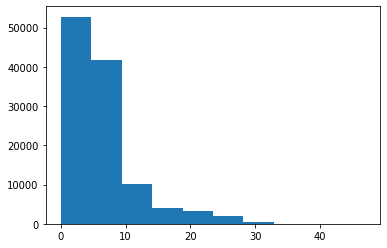

In [36]:
#중앙값
# 인풋 길이 '중앙값' 알아내기 : 인풋 길이를 담은 어레이를 만들고 중간값을 알아낸 후 패딩 맥스렌으로 일률적으로 인풋 길이를 맞춘다.
l = np.array( [len(x) for x in t_x ] ) # 각 인풋 묶음의 길이 값이 모였다
plt.hist(l) # 길이값의 편향을 확인하여 맥스렌 값을 결정, 대칭형태면 평균과 중앙값이 비슷하다. 편향이 심할수록 중앙값이 좋다, 실질적인 데이터는 편향이 심한 것이 많다
np.median(l) ,np.max(l),np.mean(l)

(4.0, 31, 5.3207600084133775)

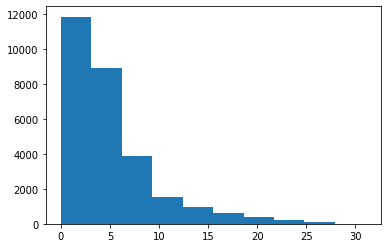

In [37]:
# 인풋 길이 '중앙값' 알아내기 : 인풋 길이를 담은 어레이를 만들고 중간값을 알아낸 후 패딩 맥스렌으로 일률적으로 인풋 길이를 맞춘다.
l = np.array( [len(x) for x in v_x ] ) # 각 인풋 묶음의 길이 값이 모였다
plt.hist(l) # 길이값의 편향을 확인하여 맥스렌 값을 결정, 대칭형태면 평균과 중앙값이 비슷하다. 편향이 심할수록 중앙값이 좋다, 실질적인 데이터는 편향이 심한 것이 많다
np.median(l) ,np.max(l),np.mean(l)

(4.0, 35, 5.268250072792313)

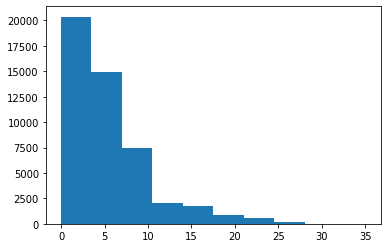

In [38]:
# 인풋 길이 '중앙값' 알아내기 : 인풋 길이를 담은 어레이를 만들고 중간값을 알아낸 후 패딩 맥스렌으로 일률적으로 인풋 길이를 맞춘다.
l = np.array( [len(x) for x in tt_x ] ) # 각 인풋 묶음의 길이 값이 모였다
plt.hist(l) # 길이값의 편향을 확인하여 맥스렌 값을 결정, 대칭형태면 평균과 중앙값이 비슷하다. 편향이 심할수록 중앙값이 좋다, 실질적인 데이터는 편향이 심한 것이 많다
np.median(l) ,np.max(l),np.mean(l)

In [39]:
#패딩

In [40]:
from keras.preprocessing.sequence import pad_sequences
t_x_pd = pad_sequences(t_x, maxlen= 15) # 맥스렌에 위에서 알아낸 중간값을 넣는다. 그 값으로 한 묶음의 길이가 정해진다
v_x_pd = pad_sequences(v_x, maxlen= 15) # 맥스렌 생략시 가장 긴 묶음을 기준으로 적은 묶음에는 0을 억지로 넣어서 맞춰준다
tt_x_pd = pad_sequences(tt_x, maxlen= 15) # 긴 묶음에서 짧은 묶음으로 줄어드는 데이터는 데이터의 손실
t_x_pd.shape, v_x_pd.shape,  tt_x_pd.shape, t_y.shape, v_y.shape, tt_y.shape


((114100, 15), (28526, 15), (48082, 15), (114100,), (28526,), (48082,))

In [41]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Bidirectional, Dropout, BatchNormalization  # Bidirectional양방향쉘 # BatchNormalization 배치정규화, RNN쉘에는 배치노말리제이션에 쓰면 안좋다. 입력전부 배치노말이 적용되어 단기기억을 추가적으로 야기시킬 수 있다 절대는 아니다
#드롭아웃과 배치노말리제이션은 처음부터 걸진 않는다.
import matplotlib.pyplot as plt
import numpy as np # np.array(리스트)

In [42]:
# '임베딩','신경망'만들기 : 임베딩은 자동 원핫의 일종
import tensorflow as tf
tf.keras.utils.set_random_seed(42) # 42로 고정되는 시드
tf.config.experimental.enable_op_determinism() # 이것도 고정 하는 것  
from keras import Sequential # 모델
from keras.layers import SimpleRNN, LSTM, GRU,   Dense, Embedding      
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
m = Sequential()  # 시퀀셜 모델 선언
m.add(Embedding(150001,50,input_length=15 )) # 501 : 보캐사이즈. 단어 수, 렌(유닉(벡터화한)-행값이랑 혼돈 조심 : 인풋값의종류수, 500위까지 뽑았으니까, 0까지 포함하여 그 이상으로 입력해야함, 1부터500까지 다 뽑히진 않았으면 500으로 넣어도 error안남 , 16차원(임의설정), 178 인풋 한묶음의 길이 (투카테원핫은 경우 500차원으로 느는데 임베딩은 차원이 적게 늘어서 좋다. 벡터화시키기 때문에 차원을 줄일 수 있다) # 투카테고리컬이 위에 왔다면 임베딩은 없고 아래 순환시퀀스에 인풋input_shape=(178,500) 을 넣어줘야한다. # 16 차원에 점하나 찍은 벡터화
m.add( Bidirectional( LSTM(16,dropout=0.3,  return_sequences=True)) ) # 순환신경망은 인풋을 시퀀스로 받아야하기 때문에 연속으로 나열하려면 리턴시퀀스를 넣어야 한다. 
m.add(BatchNormalization())
m.add( Bidirectional( LSTM(16 ,dropout=0.3) ) ) 
m.add(BatchNormalization())
m.add( Dense( 1, activation='sigmoid' ) ) # 아웃풋1개, 출력층, 0은 부정적리뷰 1은 긍정적리뷰, # 이진분류(두개중하나선택) + 다중 레이블/라벨 분류(여러개중여러개선택) : 시그모이드 # 다중클래스분류(여러개중하나선택) : softmax # 회귀 : 액티베이션함수 없음      
m.summary()  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 50)            7500050   
                                                                 
 bidirectional (Bidirectiona  (None, 15, 32)           8576      
 l)                                                              
                                                                 
 batch_normalization (BatchN  (None, 15, 32)           128       
 ormalization)                                                   
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               6272      
 nal)                                                            
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                        

Epoch 1/10
1783/1783 [==============================] - 56s 27ms/step - loss: 0.6464 - accuracy: 0.6264 - val_loss: 0.5181 - val_accuracy: 0.7273
Epoch 2/10
1783/1783 [==============================] - 45s 25ms/step - loss: 0.4999 - accuracy: 0.7423 - val_loss: 0.4704 - val_accuracy: 0.7631
Epoch 3/10
1783/1783 [==============================] - 45s 25ms/step - loss: 0.4510 - accuracy: 0.7764 - val_loss: 0.4514 - val_accuracy: 0.7752
Epoch 4/10
1783/1783 [==============================] - 46s 26ms/step - loss: 0.4221 - accuracy: 0.7957 - val_loss: 0.4411 - val_accuracy: 0.7809
Epoch 5/10
1783/1783 [==============================] - 46s 26ms/step - loss: 0.4012 - accuracy: 0.8093 - val_loss: 0.4381 - val_accuracy: 0.7847
Epoch 6/10
1783/1783 [==============================] - 45s 25ms/step - loss: 0.3834 - accuracy: 0.8218 - val_loss: 0.4308 - val_accuracy: 0.7931
Epoch 7/10
1783/1783 [==============================] - 46s 26ms/step - loss: 0.3689 - accuracy: 0.8331 - val_loss: 0.4272 -

[0.4306353032588959, 0.797533392906189]

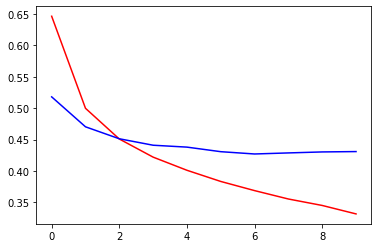

In [43]:
# 학습방법, 얼리스탑, 체크포인트 지정
m.compile(optimizer = RMSprop(learning_rate=0.0001) , loss='binary_crossentropy'  , metrics=['accuracy'])  # 옵티마이저 알엠 기본값, 옵티마이저는 백프로파게이션값을 계산하는 함수다. 액티베이션은 인풋-아웃풋 과정에서 웨이트를 갱신하는 함수 # 로스펑션: 은 손실값을 계산하는 함수, 아웃풋기준 이진분류니까 binary, 다중분류면 sparse_categorical_crossentropy 다중분류인데 아웃풋을 원핫했으면 categorical_crossentropy : 아웃풋 원핫은 표현방법일 뿐 이진분류가 아니라 그대로 다중분류다 # mean_squared_error 회귀면 엠엣스이 이것만 기억 m.compile(loss='mse' metrics = ['mae'])  
es = EarlyStopping(patience= 3, restore_best_weights=True) # 손실이 떨어지지 않는 것을 4번 참는다, 베스트가중치를 기억한다.
ck = ModelCheckpoint ('m.h5') # 베스트가중치 체크포인트

# '학습' : 핏을 안해도 기존 m 에서도 초기weight 값에 의해 predict,evaluate계산이 된다. 여기서 m.fit 은 학습 시켜서 w를 갱신하는 것일 뿐이다. hy변수로 받는 것은 히스토리를 받았을 뿐 모델이 아니라 프레딕이 안된다
hy = m.fit(t_x_pd, t_y,  validation_data=(v_x_pd, v_y) ,  callbacks=[es,ck],  batch_size=64,  epochs=10  )  # 배치사이즈는 2의 배수로 #콜백사용시: 벨리데이션셋 권장 # 핏에 의한 가중치는 m 에 학습되어 있다 hy가 아니다. 딥러닝 모델은 여전히 m 이다. # 추가학습이 필요할 경우 그대로 아래칸에 복붙하면 애초에 에폭을 여러번 돌린 것과 같은 효과를 낼 수 있다.

# 로스 시각화
plt.plot(hy.history['loss'],color='r')
plt.plot(hy.history['val_loss'],color='b')

# 테스트셋 검증
m.predict(tt_x_pd) # x값을 받아서 y값을 예측
m.evaluate(tt_x_pd,tt_y)  # x,y 를 받아서 (로스, 정확도) 측정 

In [44]:
m.evaluate(tt_x_pd,tt_y)  # x,y 를 받아서 (로스, 정확도) 측정 

1503/1503 [==============================] - 8s 5ms/step - loss: 0.4306 - accuracy: 0.7975


[0.4306353032588959, 0.797533392906189]